# Import Required Libraries
Import libraries such as NumPy, Matplotlib, Pandas, and any other required libraries for data preprocessing and visualization.

In [2]:
# Import necessary libraries for data preprocessing and visualization
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns  # For enhanced visualizations

# Configure Matplotlib for inline plotting in Jupyter Notebook
%matplotlib inline

# Set Seaborn style for better aesthetics
sns.set(style="whitegrid")

# Load Raw Data
Load the raw data from the provided HDF5 files using h5py and display basic information about the dataset.

In [3]:
# Load Raw Data

import h5py  # For working with HDF5 files

# Define the path to the raw data file
raw_data_path = "ATMEGA_AES_v1/ATM_AES_v1_fixed_key/ASCAD_data/ASCAD_databases/ATMega8515_raw_traces.h5"

# Load the raw data using h5py
with h5py.File(raw_data_path, "r") as raw_data_file:
    # Display the structure of the HDF5 file
    print("Keys in the HDF5 file:", list(raw_data_file.keys()))
    
    # Load traces and metadata
    raw_traces = raw_data_file["traces"][:]
    raw_metadata = raw_data_file["metadata"]

    # Display basic information about the traces
    print(f"Number of traces: {raw_traces.shape[0]}")
    print(f"Number of points per trace: {raw_traces.shape[1]}")

    # Display metadata fields
    print("Metadata fields:", list(raw_metadata.dtype.fields.keys()))

Keys in the HDF5 file: ['metadata', 'traces']
Number of traces: 60000
Number of points per trace: 100000
Metadata fields: ['plaintext', 'ciphertext', 'key', 'masks']


# Visualize Raw Data
Create visualizations (e.g., line plots or histograms) to show the characteristics of the raw data.

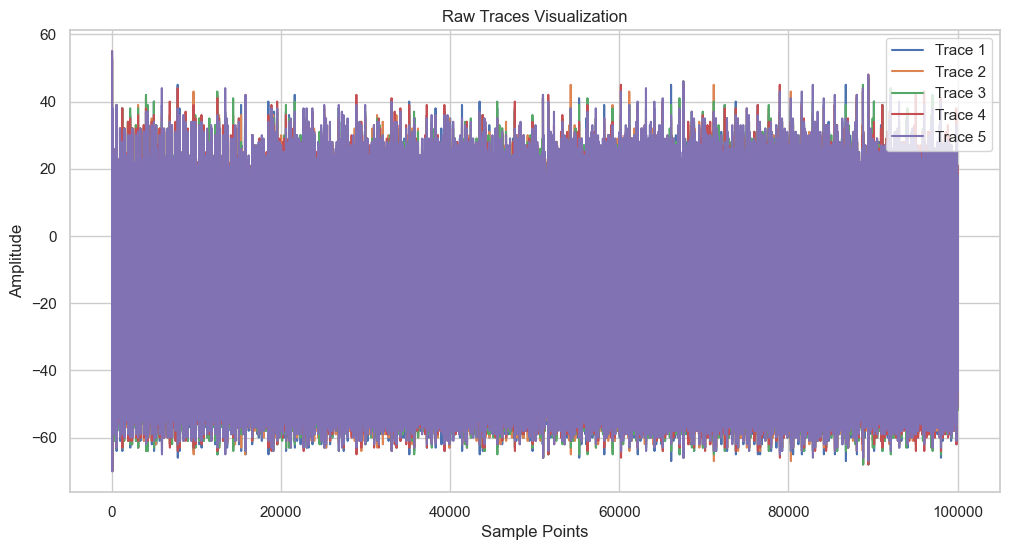

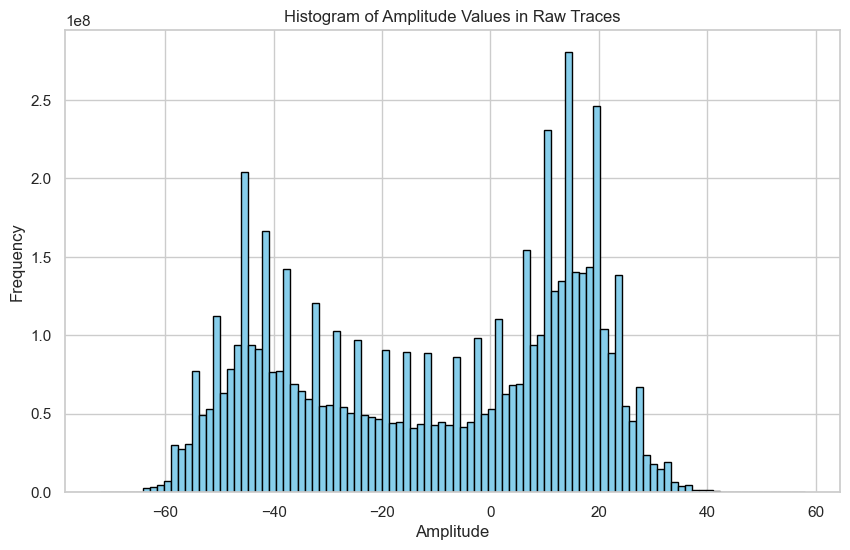

: 

In [4]:
# Visualize Raw Data

# Plot a few raw traces to visualize their structure
plt.figure(figsize=(12, 6))
for i in range(5):  # Plot the first 5 traces
    plt.plot(raw_traces[i], label=f"Trace {i+1}")
plt.title("Raw Traces Visualization")
plt.xlabel("Sample Points")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

# Plot a histogram of the amplitude values across all traces
plt.figure(figsize=(10, 6))
plt.hist(raw_traces.flatten(), bins=100, color="skyblue", edgecolor="black")
plt.title("Histogram of Amplitude Values in Raw Traces")
plt.xlabel("Amplitude")
plt.ylabel("Frequency")
plt.show()

# Compute and visualize the mean and standard deviation of the traces
mean_trace = np.mean(raw_traces, axis=0)
std_trace = np.std(raw_traces, axis=0)

plt.figure(figsize=(12, 6))
plt.plot(mean_trace, label="Mean Trace", color="blue")
plt.fill_between(
    range(len(mean_trace)),
    mean_trace - std_trace,
    mean_trace + std_trace,
    color="blue",
    alpha=0.2,
    label="Mean ± Std Dev",
)
plt.title("Mean and Standard Deviation of Raw Traces")
plt.xlabel("Sample Points")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

# Data Preprocessing Pipeline
Define a preprocessing pipeline (e.g., normalization, noise reduction, or feature extraction) and display a diagram of the pipeline using a library like Graphviz or Matplotlib.

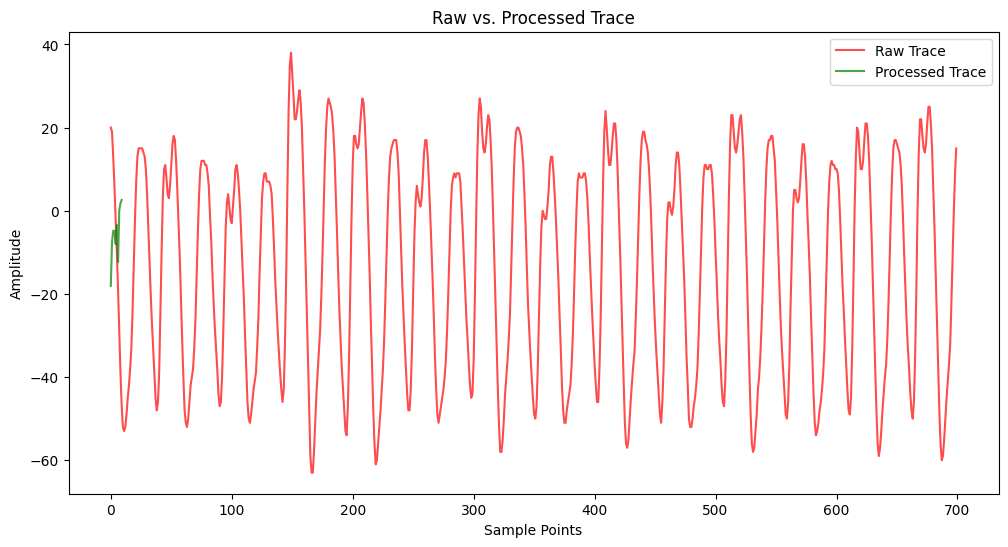

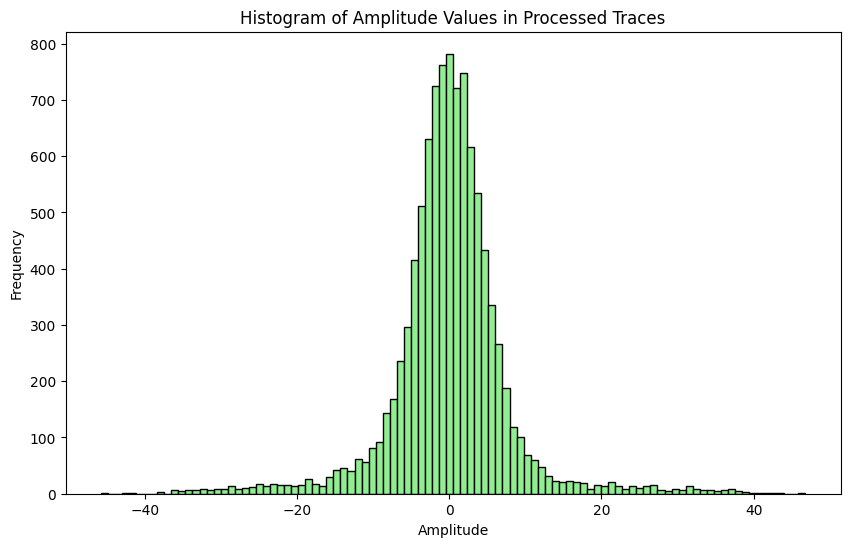

In [11]:
# Data Preprocessing Pipeline

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import graphviz
from sklearn.pipeline import Pipeline
import h5py
import matplotlib.pyplot as plt  # Import for plotting

# Path to the ASCAD database
ascad_database_path = "ATMEGA_AES_v1/ATM_AES_v1_fixed_key/ASCAD_data/ASCAD_databases/ASCAD.h5"

# Load the raw traces
with h5py.File(ascad_database_path, "r") as f:
    raw_traces = f["Profiling_traces/traces"][:1000]  # Load the first 1000 traces for testing

# Define the preprocessing pipeline
pipeline = Pipeline([
    ('scaling', StandardScaler()),  # Step 1: Standardize the data
    ('pca', PCA(n_components=10))   # Step 2: Reduce dimensionality using PCA
])

# Visualize the pipeline using Graphviz
pipeline_diagram = graphviz.Digraph(format='png', graph_attr={'rankdir': 'LR'})
pipeline_diagram.node('Raw Data', shape='ellipse')
pipeline_diagram.node('Scaling', shape='box')
pipeline_diagram.node('PCA', shape='box')
pipeline_diagram.node('Processed Data', shape='ellipse')

pipeline_diagram.edge('Raw Data', 'Scaling', label='StandardScaler')
pipeline_diagram.edge('Scaling', 'PCA', label='PCA (n_components=10)')
pipeline_diagram.edge('PCA', 'Processed Data')

# Render the pipeline diagram
pipeline_diagram.render('pipeline_diagram', view=True)

# Apply the preprocessing pipeline to the raw traces
processed_traces = pipeline.fit_transform(raw_traces)

# Visualize raw vs. processed data
plt.figure(figsize=(12, 6))
plt.plot(raw_traces[0], label="Raw Trace", color="red", alpha=0.7)
plt.plot(processed_traces[0], label="Processed Trace", color="green", alpha=0.7)
plt.title("Raw vs. Processed Trace")
plt.xlabel("Sample Points")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

# Plot a histogram of the processed data
plt.figure(figsize=(10, 6))
plt.hist(processed_traces.flatten(), bins=100, color="lightgreen", edgecolor="black")
plt.title("Histogram of Amplitude Values in Processed Traces")
plt.xlabel("Amplitude")
plt.ylabel("Frequency")
plt.show()

# Apply Preprocessing
Apply the preprocessing steps to the raw data and store the processed data.

In [7]:
# Apply Preprocessing

# Apply the preprocessing pipeline to the raw traces
processed_traces = pipeline.fit_transform(raw_traces)

# Save the processed data to a new HDF5 file
processed_data_path = "ATMEGA_AES_v1/ATM_AES_v1_fixed_key/ASCAD_data/ASCAD_databases/processed_traces.h5"
with h5py.File(processed_data_path, "w") as processed_data_file:
    processed_data_file.create_dataset("traces", data=processed_traces)
    print(f"Processed data saved to {processed_data_path}")

Processed data saved to ATMEGA_AES_v1/ATM_AES_v1_fixed_key/ASCAD_data/ASCAD_databases/processed_traces.h5


# Visualize Processed Data
Create visualizations to compare the processed data with the raw data, highlighting the improvements achieved through preprocessing.

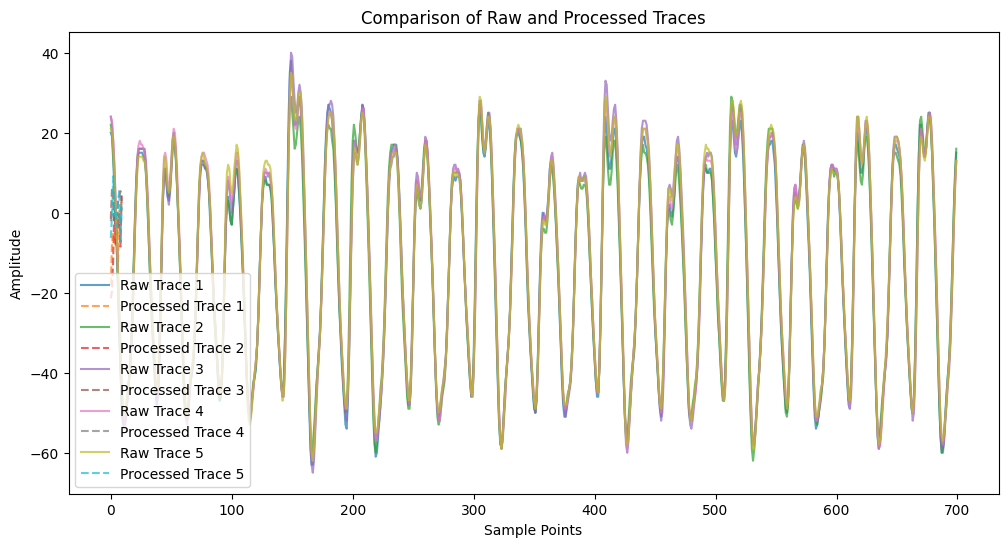

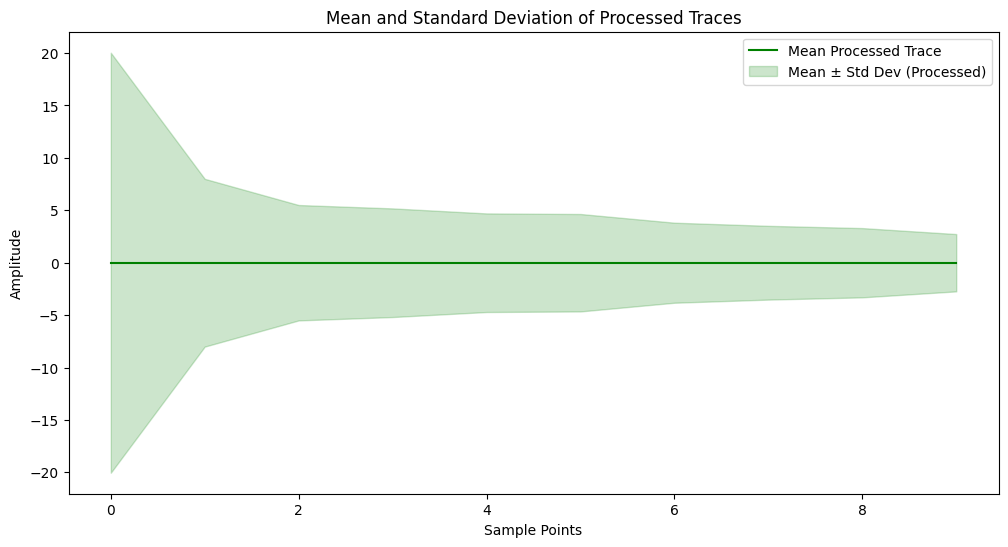

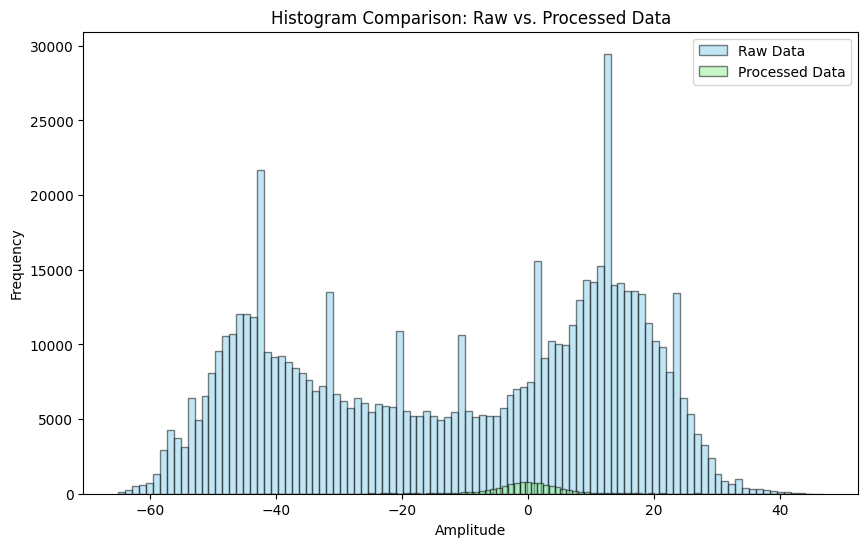

In [10]:
# Visualize Processed Data

import numpy as np  # Import for numerical operations

# Compare the first 5 raw and processed traces
plt.figure(figsize=(12, 6))
for i in range(5):
    plt.plot(raw_traces[i], label=f"Raw Trace {i+1}", alpha=0.7)
    plt.plot(processed_traces[i], label=f"Processed Trace {i+1}", linestyle="--", alpha=0.7)
plt.title("Comparison of Raw and Processed Traces")
plt.xlabel("Sample Points")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

# Visualize the mean and standard deviation of processed traces
mean_processed_trace = np.mean(processed_traces, axis=0)
std_processed_trace = np.std(processed_traces, axis=0)

plt.figure(figsize=(12, 6))
plt.plot(mean_processed_trace, label="Mean Processed Trace", color="green")
plt.fill_between(
    range(len(mean_processed_trace)),
    mean_processed_trace - std_processed_trace,
    mean_processed_trace + std_processed_trace,
    color="green",
    alpha=0.2,
    label="Mean ± Std Dev (Processed)",
)
plt.title("Mean and Standard Deviation of Processed Traces")
plt.xlabel("Sample Points")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

# Overlay histograms of raw and processed data for comparison
plt.figure(figsize=(10, 6))
plt.hist(raw_traces.flatten(), bins=100, color="skyblue", alpha=0.5, label="Raw Data", edgecolor="black")
plt.hist(processed_traces.flatten(), bins=100, color="lightgreen", alpha=0.5, label="Processed Data", edgecolor="black")
plt.title("Histogram Comparison: Raw vs. Processed Data")
plt.xlabel("Amplitude")
plt.ylabel("Frequency")
plt.legend()
plt.show()